##Name: Ameer Hamza
##Email: ameer4955@gmail.com

#Train a Fully connected Neural Network on Fashion MNIST dataset
##1. Dataset
##1.a. You are provided with the fashion MNIST dataset
##1.b. Read the description of dataset here

In [13]:
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

In [14]:
# Checking Available Devices
import tensorflow as tf
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 212627625928684209
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14328594432
locality {
  bus_id: 1
  links {
  }
}
incarnation: 13817777782862043868
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


##2. Split the data into x_train, y_train, x_test and y_test.

In [15]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

##2.a. Display the sample images from x_train

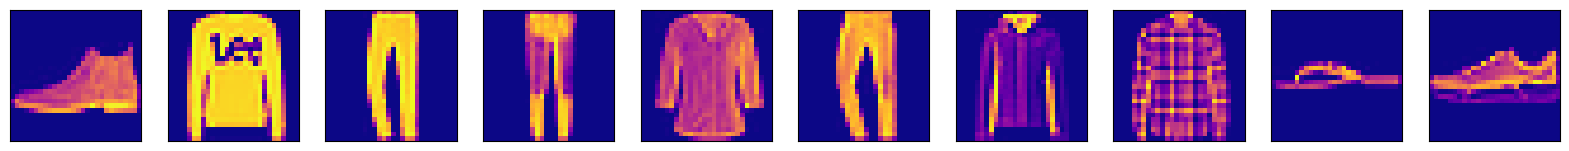

In [16]:
import matplotlib.pyplot as plt

# Number of digits to display
n = 10

# Create a figure to display the images
plt.figure(figsize=(20, 4))

# Loop through the first 'n' images
for i in range(n):
    # Create a subplot within the figure
    ax = plt.subplot(2, n, i + 1)

    # Display the original image
    plt.imshow(x_test[i].reshape(28, 28))

    # Set colormap to grayscale
    plt.plasma()

    # Hide x-axis and y-axis labels and ticks
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# Show the figure with the images
plt.show()

# Close the figure
plt.close()

##2.b. Display the shape of x_train and y_train

In [17]:
# Print the shapes of the original training data and labels
print(f"x_train shape: {x_train.shape}")
print(f"x_train shape:{x_train.shape}")

x_train shape: (60000, 28, 28)
x_train shape:(60000, 28, 28)


##3. Flatten the images
##3.a. Reshape the images from 28x28 to 784-dimension vector

In [18]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
print(f"Flattened X_train shape: {x_train.shape}\nFlattened Y_train shape:{x_test.shape}")

Flattened X_train shape: (60000, 28, 28, 1)
Flattened Y_train shape:(10000, 28, 28, 1)


##4. Scale the data
##4.a. Convert the data into float 32 type

In [19]:
# Convert the data type of the images to float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

##4.b. Scale the data by dividing x_train and y_train by 255

In [20]:
# Normalize the pixel values to a range between 0 and 1  # Zero is for Black  #1 for White
x_train /= 255
x_test /= 255

##4.c. Display the shape of x_train and y_train after scaling.

In [21]:
num_classes = 10

# Convert the labels to one-hot encoded format
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Seeing updated Shapes
print("x_train Shape :", x_train.shape)
print("y_train Shape :", y_train.shape)
print("x_test Shape :", x_test.shape)
print("y_test Shape :", y_test.shape)

x_train Shape : (60000, 28, 28, 1)
y_train Shape : (60000, 10)
x_test Shape : (10000, 28, 28, 1)
y_test Shape : (10000, 10)


##5. Define the hyper parameters for the neural networks

In [22]:
# Define the number of filters for each layer of the CNN
filters = [6, 32, 80, 120]  # These are the number of filters in each layer of the CNN
# filters = [6, 32, 80, 120]
# filters = [8, 32, 80, 120]

# a. Learning rate
lr = 0.001
print("Learning rate =", lr)

# b. No. of Epochs
epochs = 15
print("Number of Epochs =", epochs)

# c. Batch size
batch_size=64
print("Batch size =", batch_size)

# d. Input_size
img_rows, img_cols, channels = 28, 28, 1  # 1 for greyscale images and 3 for rgb images
print(f"Input_size = {img_rows} Rows, {img_cols} Columns, {channels} Channel")

# e. Hidden layer1
print("Layer1 =", filters[0])

# f. Hidden layers
print("Layer2 =", filters[1])
print("Layer3 =", filters[2])
print("Layer4 =", filters[3])

# g. Output_size
output = 10  # This is the number of different categories that the CNN will classify images into
print("Output_size =", output)

Learning rate = 0.001
Number of Epochs = 15
Batch size = 64
Input_size = 28 Rows, 28 Columns, 1 Channel
Layer1 = 6
Layer2 = 32
Layer3 = 80
Layer4 = 120
Output_size = 10


In [23]:
# Create a Sequential model, which allows us to build a neural network layer by layer
model = Sequential()

#6.a. No of hidden layers
hidden_layers = 2

#6.b. Activation function for each layer neurons
model.add(Conv2D(filters[0],(3,3),padding='same',\
                 activation='relu',input_shape=(img_rows,img_cols, channels)))
model.add(MaxPooling2D(pool_size=(2,2))) #For reducing image size
# (dim+pad-kernel)/2   (28 +3 -3)/2 = 14
model.add(Conv2D(filters[1],(2,2),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# (dim+pad-kernel)/2   (14 +2 -2)/2 = 7
model.add(Conv2D(filters[2],(2,2),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# (dim+pad-kernel)/2   (7 +2 -2)/2 = 3
model.add(Conv2D(filters[3],(2,2),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# (dim+pad-kernel)/2   (3 +2 -2)/2 = 1
model.add(Flatten())
model.add(Dense(64,activation='relu'))


#6.c. Number of output layer neurons and activation function
model.add(Dense(output, activation='softmax'))

#6.d. Compile the model and provide following arguments
#i. Loss function
#ii. Optimizer
#iii. Metric
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr),
              metrics=['accuracy'])

#6.e. Display the summary of the mode
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 6)         60        
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 32)        800       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 7, 7, 80)          10320     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 3, 3, 80)        

##7. Train the Neural Network

In [24]:
#7.a. Fit the Model
model.fit(x_train, y_train, validation_split= 0.2, epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/15
750/750 [==============================] - 6s 5ms/step - loss: 0.6865 - accuracy: 0.7481 - val_loss: 0.4525 - val_accuracy: 0.8313
Epoch 2/15
750/750 [==============================] - 4s 6ms/step - loss: 0.4033 - accuracy: 0.8534 - val_loss: 0.3702 - val_accuracy: 0.8649
Epoch 3/15
750/750 [==============================] - 4s 6ms/step - loss: 0.3442 - accuracy: 0.8729 - val_loss: 0.3347 - val_accuracy: 0.8801
Epoch 4/15
750/750 [==============================] - 4s 5ms/step - loss: 0.3133 - accuracy: 0.8860 - val_loss: 0.3061 - val_accuracy: 0.8888
Epoch 5/15
750/750 [==============================] - 4s 6ms/step - loss: 0.2924 - accuracy: 0.8923 - val_loss: 0.2986 - val_accuracy: 0.8907
Epoch 6/15
750/750 [==============================] - 4s 5ms/step - loss: 0.2703 - accuracy: 0.9001 - val_loss: 0.2772 - val_accuracy: 0.8996
Epoch 7/15
750/750 [==============================] - 4s 5ms/step - loss: 0.2576 - accuracy: 0.9046 - val_loss: 0.2906 - val_accuracy: 0.8933
Epoch 

##8. Test the model
##8.a. Find the testing accuracy of the model

In [25]:
# Import the necessary libraries
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Predict probabilities for the test set using the trained model
y_pred_probs = model.predict(x_test, verbose=0)
y_pred = np.where(y_pred_probs > 0.5, 1, 0)

# Calculate and print the test accuracy using predicted and true labels
test_accuracy = accuracy_score(y_pred, y_test)
print("\nTest accuracy: {}".format(test_accuracy))


Test accuracy: 0.8944


##8.b. Compare the training and testing accuracy and write you observation in the comments

In [26]:
# Below are some training loss and accuracy for different filter values and different optimizer.
# filters = [6, 32, 80, 120]// optimizer='sgd'
# 750/750 [==============================] - 22s 29ms/step - loss: 0.4030 - accuracy: 0.8539 - val_loss: 0.4152 - val_accuracy: 0.8514


# filters = [8, 32, 80, 120]// optimizer='sgd'
# 750/750 [==============================] - 22s 29ms/step - loss: 0.4437 - accuracy: 0.8371 - val_loss: 0.4476 - val_accuracy: 0.8366


# filters = [6, 36, 80, 120]// optimizer='sgd'
# 750/750 [==============================] - 26s 34ms/step - loss: 0.3972 - accuracy: 0.8558 - val_loss: 0.4135 - val_accuracy: 0.8502


# filters = [6, 36, 80, 120]// optimizer=Adam(0.001)
# 750/750 [==============================] - 23s 31ms/step - loss: 0.2137 - accuracy: 0.9202 - val_loss: 0.2574 - val_accuracy: 0.9064


# filters = [6, 36, 80, 120]// optimizer=Adam(0.01)
# 750/750 [==============================] - 22s 30ms/step - loss: 0.3077 - accuracy: 0.8892 - val_loss: 0.3371 - val_accuracy: 0.8839


# Observation
"""We can see that changing filter values don't have significant effect on loss \
and accuracy, so I changed optimizer with 0.001 learning rate to improve accuracy. \
Training accuracy is 0.9372 while testing accuracy is 0.8944. The small difference \
shows that this dataset is neither underfit or overfit."""

"We can see that changing filter values don't have significant effect on loss and accuracy, so I changed optimizer with 0.001 learning rate to improve accuracy. Training accuracy is 0.90 while testing accuracy is 0.88. The small difference shows that this dataset is neither underfit or overfit."

##8.c. Display the predicted labels along the input image

1/1 [==============================] - 0s 115ms/step


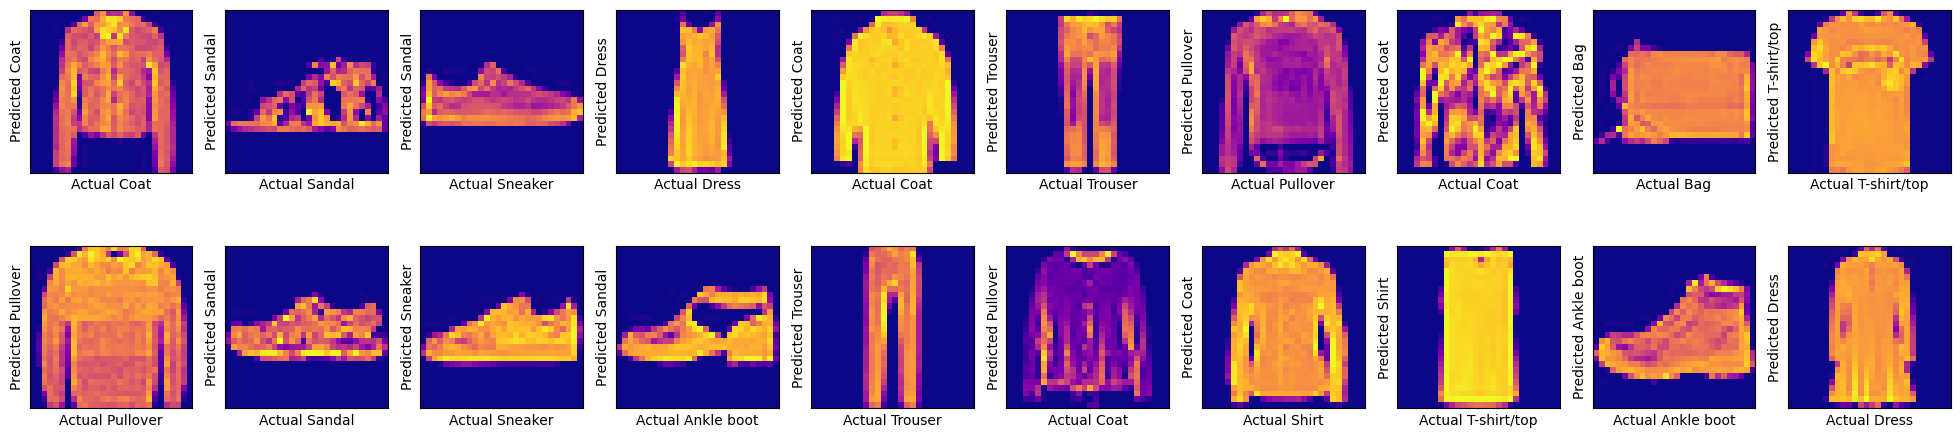

In [27]:
# pricted labels
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Define a mask for selecting a range of indices (20 to 49)
mask = range(110, 140)

# Select the first 20 samples from the test set for visualization
X_valid = x_test[10:30]
actual_labels = y_test[10:30]

# Predict probabilities for the selected validation samples
y_pred_probs_valid = model.predict(X_valid)
y_pred_valid = np.where(y_pred_probs_valid > 0.5, 1, 0)

# Set up a figure to display images
n = len(X_valid)
plt.figure(figsize=(50, 24))

for i in range(n):
    # Display the original image
    actual_output = classes[list(actual_labels[i]).index(1)]
    predicted_digit = np.argmax(y_pred_probs_valid[i])
    predicted_output = classes[predicted_digit]
    half_col = round(n / 2)
    if (i < half_col):
      ax = plt.subplot(8, n, i + 1)
    else:
      ax = plt.subplot(8, n, half_col + i + 1)
    plt.imshow(X_valid[i].reshape(28, 28))
    plt.plasma()
    ax.set_ylabel(f"""Predicted {predicted_output}""")
    ax.set_xlabel(f"""Actual {actual_output}""")
    ax.xaxis.set_tick_params(labelbottom=False)
    ax.yaxis.set_tick_params(labelleft=False)
    ax.set_xticks([])
    ax.set_yticks([])

# Show the plotted images
plt.show()

# Close the plot
plt.close()